In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import torch
import logging

import tensorcraft as tc

log = logging.getLogger("tensorcraft")
log.setLevel("INFO")

24-04-2025 07:16:03 : INFO : multi_axis_dist : apply -- R3: Processor multi index: torch.Size([1, 1])
24-04-2025 07:16:03 : INFO : multi_axis_dist : apply -- R3: Missing elements: [2, 0]
24-04-2025 07:16:03 : INFO : multi_axis_dist : apply -- R3: N blocks per axis: [1, 1]
24-04-2025 07:16:03 : INFO : multi_axis_dist : apply -- R3: Padded tensor shape: torch.Size([22, 5])
24-04-2025 07:16:03 : INFO : multi_axis_dist : apply -- R3: Permute tuple: (0, 2, 1, 3)
24-04-2025 07:16:03 : INFO : multi_axis_dist : apply -- R3: Reshape tuple: [2, 11, 1, 5]
24-04-2025 07:16:03 : INFO : multi_axis_dist : apply -- R3: Tile Slices: [slice(tensor(1), None, 2), slice(None, None, None), slice(None, None, None), slice(None, None, None)]
24-04-2025 07:16:03 : INFO : multi_axis_dist : apply -- R3: Local tensor shape: torch.Size([1, 11, 1, 5])
24-04-2025 07:16:03 : INFO : multi_axis_dist : apply -- R3: Target local tensor shape: [11, 5]
24-04-2025 07:16:03 : INFO : multi_axis_dist : apply -- R3: Linear proce

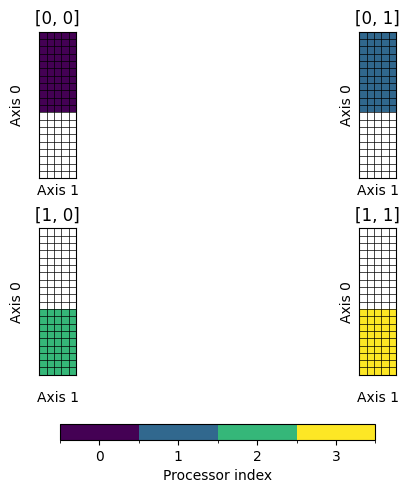

In [ ]:
rank = 3

x = torch.arange(100).reshape(20, 5)
global_shape = x.shape

mesh = torch.Size((2, 2))
dist = tc.mpi.MPIMultiAxisDist(mesh, ((0,),()), 11)

tensor_shape = x.shape
x_local = dist.apply(x, rank)
print(x_local)

fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, dist, cbar=True)

24-04-2025 07:16:05 : INFO : multi_axis_dist : apply_split -- R3: Local tensor shape: torch.Size([9, 5])
24-04-2025 07:16:05 : INFO : multi_axis_dist : apply_split -- R3: Predicted shape: torch.Size([9, 5])
24-04-2025 07:16:05 : INFO : multi_axis_dist : apply_split -- New distribution: D_[2,2]⊥{0,1}(11,3)
24-04-2025 07:16:05 : INFO : multi_axis_dist : apply_split -- R3: Processor multi index: torch.Size([1, 1])
24-04-2025 07:16:05 : INFO : multi_axis_dist : apply_split -- R3: Missing elements 1
24-04-2025 07:16:05 : INFO : multi_axis_dist : apply_split -- R3: Padding tuple: [0, 0, 1, 0]
24-04-2025 07:16:05 : INFO : multi_axis_dist : apply_split -- R3: Padded local tensor shape: torch.Size([9, 6])
24-04-2025 07:16:05 : INFO : multi_axis_dist : apply_split -- R3: Reshape list: [9, 2, 3]
24-04-2025 07:16:05 : INFO : multi_axis_dist : apply_split -- R3: Permute list: [0, 1, 2]
24-04-2025 07:16:05 : INFO : multi_axis_dist : apply_split -- R3: Tile Slices: [slice(None, None, None), slice(ten

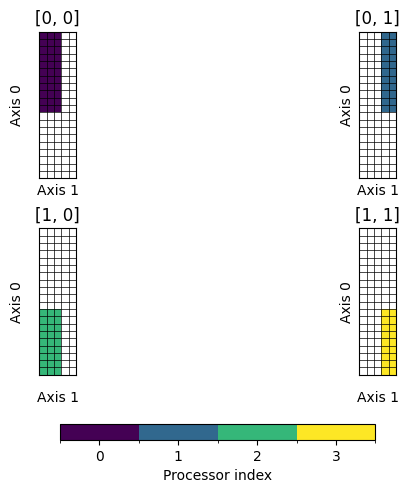

In [ ]:
new_dist, x_local_split = dist.apply_split(global_shape, x_local, rank, 1, 1, 3, minor=False)

print(x_local_split)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist, cbar=True)

In [ ]:
rank = 0
x = torch.arange(40).reshape(2, 10, 2)
mesh = torch.Size([2,2])
dist = tc.mpi.MPIMultiAxisDist(mesh, (None, (0,1), None), 1)

x_local = dist.apply(x, rank)
print(x_local)

24-04-2025 07:16:06 : INFO : multi_axis_dist : apply -- R0: Processor multi index: torch.Size([0, 0])
24-04-2025 07:16:06 : INFO : multi_axis_dist : apply -- R0: Missing elements: [0, 1, 0]
24-04-2025 07:16:06 : INFO : multi_axis_dist : apply -- R0: N blocks per axis: [1, 10, 1]
24-04-2025 07:16:06 : INFO : multi_axis_dist : apply -- R0: Padded tensor shape: torch.Size([2, 11, 2])
24-04-2025 07:16:06 : INFO : multi_axis_dist : apply -- R0: Permute tuple: (0, 2, 4, 1, 3, 5)
24-04-2025 07:16:06 : INFO : multi_axis_dist : apply -- R0: Reshape tuple: [1, 2, 11, 1, 1, 2]
24-04-2025 07:16:06 : INFO : multi_axis_dist : apply -- R0: Tile Slices: [slice(None, None, None), slice(None, None, None), slice(tensor(0), None, 4), slice(None, None, None), slice(None, None, None), slice(None, None, None)]
24-04-2025 07:16:06 : INFO : multi_axis_dist : apply -- R0: Local tensor shape: torch.Size([1, 2, 3, 1, 1, 2])
24-04-2025 07:16:06 : INFO : multi_axis_dist : apply -- R0: Target local tensor shape: [2,

In [ ]:
import math

shape = torch.Size([51])
mesh = torch.Size([2,2])
mapping = ((0,),)
rank = 2
split_dim =1
split_axis = 0
minor = False

dist = tc.mpi.MPIMultiAxisDist(mesh, mapping, 2)

x = torch.arange(math.prod(shape)).reshape(shape)

x_local = dist.apply(x, rank)
print(x_local.shape)
new_dist, x_local_split = dist.apply_split(shape, x_local, rank, split_axis, split_dim, 1, minor=minor)
print(x_local_split.shape)


24-04-2025 07:20:56 : INFO : multi_axis_dist : apply -- R2: Processor multi index: torch.Size([1, 0])
24-04-2025 07:20:56 : INFO : multi_axis_dist : apply -- R2: Missing elements: [1]
24-04-2025 07:20:56 : INFO : multi_axis_dist : apply -- R2: N blocks per axis: [25]
24-04-2025 07:20:56 : INFO : multi_axis_dist : apply -- R2: Padded tensor shape: torch.Size([52])
24-04-2025 07:20:56 : INFO : multi_axis_dist : apply -- R2: Permute tuple: (0, 1)
24-04-2025 07:20:56 : INFO : multi_axis_dist : apply -- R2: Reshape tuple: [26, 2]
24-04-2025 07:20:56 : INFO : multi_axis_dist : apply -- R2: Tile Slices: [slice(tensor(1), None, 2), slice(None, None, None)]
24-04-2025 07:20:56 : INFO : multi_axis_dist : apply -- R2: Local tensor shape: torch.Size([13, 2])
24-04-2025 07:20:56 : INFO : multi_axis_dist : apply -- R2: Target local tensor shape: [26]
24-04-2025 07:20:56 : INFO : multi_axis_dist : apply -- R2: Linear processor index: 1, Residue: 1, Block size: 2, axis: 0, N procs: 2, N full blocks: 2

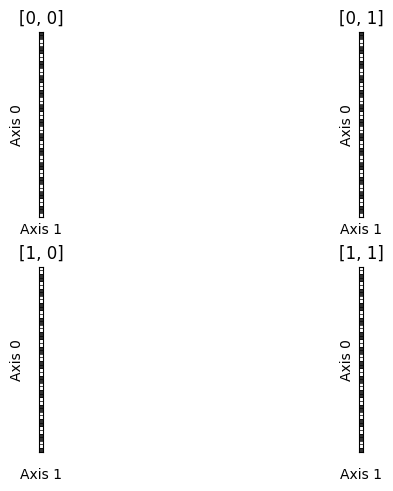

In [ ]:
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, shape, dist, cbar=False, monochrome=True)